In [1]:
!pip install ydata-profiling

  Obtaining dependency information for numpy<1.24,>=1.16.0 from https://files.pythonhosted.org/packages/e4/f3/679b3a042a127de0d7c84874913c3e23bb84646eb3bc6ecab3f8c872edc9/numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires p

In [2]:
# VISULIZATION
import seaborn as sns
import matplotlib.pyplot as plt

# 🚀 PYTORCH 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# ⚙️ DATA PROCESSING 
import pandas as pd
import os

#PROFILEREPORT
from ydata_profiling import ProfileReport

#SKLEARN
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, auc, f1_score

#WARNINGS
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

In [3]:
CONFIG = {
    'seed': 42  # Replace 42 with the seed value you wanna use
}

def set_seed(seed=42):
    torch.manual_seed(seed)  #  Set seed for PyTorch on CPU
    torch.cuda.manual_seed(seed)  #  Set seed for PyTorch on GPU
    
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)

# Set seed using the configured seed value
set_seed(CONFIG['seed']) 

In [4]:
df = pd.read_csv("/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv")

#separate features and labels
X = df.drop(['Class', 'id'], axis=1).values
y = df["Class"].values

In [5]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.info()
print("\n")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [7]:
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [id, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  #YOU CAN ALSO USE BFLOAT16 , FLOAT16 FOR OPTIMIZATION
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [13]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [14]:
class Autoencoder(nn.Module):
    """ This is autoencoder class
    -> Encoder:
        > Two fully connected layers with ReLU activation.
        > Input size reduced from input_size to 64, then to encoding_size.
     -> Decoder:
        > Two fully connected layers with ReLU activation.
        > Encoded input size expanded from encoding_size to 64, then to input_size.
        > Final layer uses Sigmoid activation. 
      -> Forward Method :
        > Takes input tensor x.
        > Passes input through the encoder.
        > The encoded representation is then passed through the decoder.
        > Returns the final output, representing the reconstructed input."""
    
    def __init__(self, input_size, encoding_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, encoding_size),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_size, 64),
            nn.ReLU(),
            nn.Linear(64, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [15]:
class Classifier(nn.Module):
    """ -> Initialization:
            > Accepts input_size parameter.
            > Initializes a linear layer (fc) with input size input_size and output size 1.
            > Adds a Sigmoid activation (sigmoid).
         -> Forward Method:
            > Takes input tensor x.
            > Applies linear transformation through fc.
            > Applies Sigmoid activation using sigmoid.
            > Returns the final output, representing the probability of input belonging to the positive class.
    """
    def __init__(self, input_size):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

In [16]:
class HybridModel(nn.Module):
    """ -> Initialization:
              > Accepts an autoencoder and a classifier as parameters.
              > Initializes the HybridModel with these components.
        -> Forward Method:
              > Takes input tensor x.
              > Passes input through the encoder of the provided autoencoder.
              > The encoded representation is then passed through the classifier.
              > Returns the final output, combining feature learning from the autoencoder with classification from the classifier.
"""
    def __init__(self, autoencoder, classifier):
        super(HybridModel, self).__init__()
        self.autoencoder = autoencoder
        self.classifier = classifier

    def forward(self, x):
        x = self.autoencoder.encoder(x)
        x = self.classifier(x)
        return x

In [17]:
input_size = X_train.shape[1]
encoding_size = 32  # You can adjust this based on your data
autoencoder = Autoencoder(input_size, encoding_size)
classifier = Classifier(encoding_size)
hybrid_model = HybridModel(autoencoder, classifier)

In [18]:
hybrid_model 

HybridModel(
  (autoencoder): Autoencoder(
    (encoder): Sequential(
      (0): Linear(in_features=29, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=32, bias=True)
      (3): ReLU()
    )
    (decoder): Sequential(
      (0): Linear(in_features=32, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=29, bias=True)
      (3): Sigmoid()
    )
  )
  (classifier): Classifier(
    (fc): Linear(in_features=32, out_features=1, bias=True)
    (sigmoid): Sigmoid()
  )
)

In [19]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(hybrid_model.parameters(), lr=0.001)

In [20]:
num_epochs = 10
for epoch in range(num_epochs):
    hybrid_model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = hybrid_model(batch_X)
        loss = criterion(outputs, batch_y.unsqueeze(1))
        loss.backward()
        optimizer.step()

In [21]:
hybrid_model.eval()
with torch.no_grad():
    test_outputs = hybrid_model(X_test_tensor)
    precision, recall, _ = precision_recall_curve(y_test_tensor.numpy(), test_outputs.numpy())
    pr_auc = auc(recall, precision)
    f1 = f1_score(y_test_tensor.numpy(), (test_outputs.numpy() > 0.5).astype(float))

print(f'Area under the Precision-Recall curve: {pr_auc:.4f}')
print(f'F1-Score: {f1:.4f}')

Area under the Precision-Recall curve: 0.9999
F1-Score: 0.9994


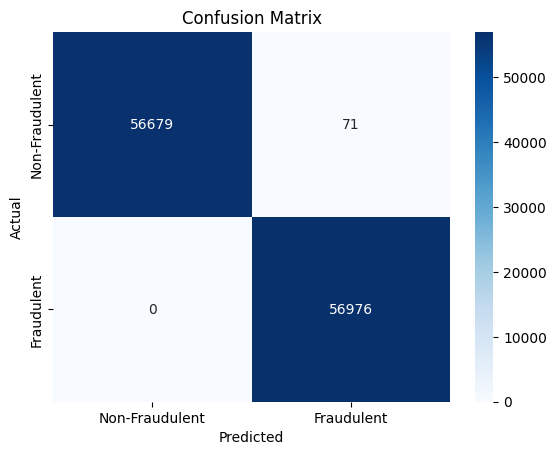

Accuracy: 99.94%


In [22]:
# Converting probabilities to binary predictions
predictions_binary = (test_outputs.numpy() > 0.5).astype(int)

# confusion matrix
conf_matrix = confusion_matrix(y_test_tensor.numpy(), predictions_binary)

# Displaying the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraudulent", "Fraudulent"], yticklabels=["Non-Fraudulent", "Fraudulent"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Accuracy
accuracy = accuracy_score(y_test_tensor.numpy(), predictions_binary)

print("Accuracy: {:.2%}".format(accuracy))

#### **SAVING THE MODEL**

In [23]:
model_path = '/kaggle/working/hybrid_model.pth'

torch.save(hybrid_model.state_dict(), model_path)